In [1]:
import os
import argparse
import json

import numpy as np
import pandas as pd
import librosa
import scipy
import matplotlib.pyplot as plt
import matplotlib.ticker as mplticker
import soundfile as sf

import bruce

DATA = os.path.realpath("../data")
AUDIOSET = os.path.join(DATA, "data/audioset/dataset")
AUDIOSET_DATA = os.path.join(AUDIOSET, "data/balanced_train_segments/audio")
AUDIOSET_OVERVIEW = os.path.join(AUDIOSET, "balanced_train_segments.csv")
AUDIOSET_ONTOLOGY = os.path.join(AUDIOSET, "ontology.json")
assert os.path.exists(AUDIOSET_ONTOLOGY)

def get_ontology():
    ont = dict()
    with open(AUDIOSET_ONTOLOGY) as f:
        data = json.load(f)
        for line in data:
            ont[line['id']] = line
    return ont
    
ont = get_ontology()

In [22]:
def fix(row):
    n_labels = row[-1].count(",") + 1
    start = row[1].strip().replace(".", "")
    stop = row[2].strip().replace(".", "")
    path = f"{row[0].strip()}_{start}_{stop}.wav"
    path = os.path.join(AUDIOSET_DATA, path)
    labels = row[-1].strip().replace('"', "").split(",")
    label_names = '/'.join([ont[l]['name'] for l in labels])
    return [x.strip().replace('"', "") for x in row] + [label_names] + [n_labels] + [path] + [os.path.exists(path)] 

records = []
with open(AUDIOSET_OVERVIEW) as f:
    next(f)
    next(f)
    header = [x.strip() for x in next(f).strip().split(",")] + ["label_names", "n_labels", "path", "exists"]
    for line in f:
        records.append(fix(line.strip().split(",", 3)))
        
data = pd.DataFrame(records, columns=header)
print(f"fraction of data downloaded: {data.exists.sum() / len(data.exists)}")
edata = data[data.exists]
edata.to_pickle("data_overview.pkl")

fraction of data downloaded: 0.2963898916967509


<Axes: >

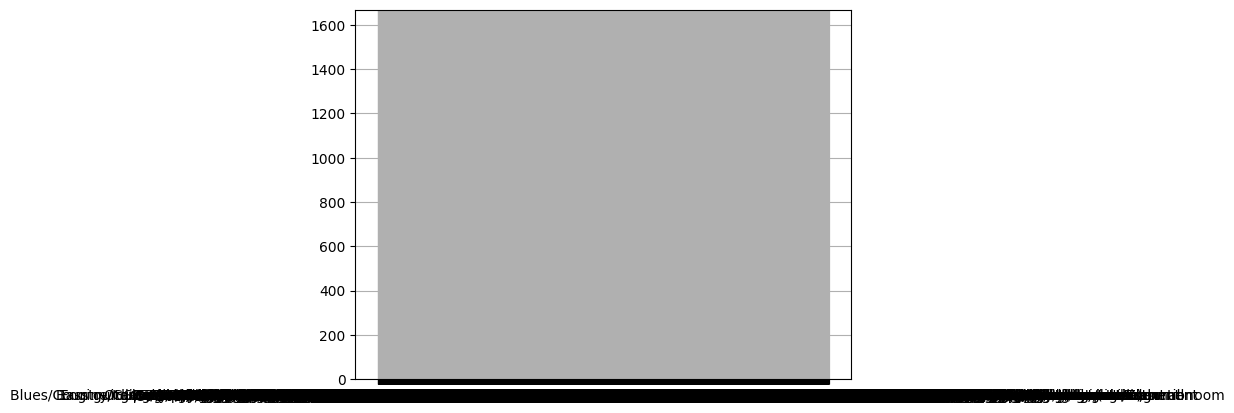